In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import pandas_profiling

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
tele_df=pd.read_csv("telecom_churn_data.csv")

## Data exploration

In [5]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
tele_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

## Data preperation

In [7]:
amt_df=tele_df[tele_df.columns[tele_df.columns.str.find('rech')!=-1]]
amt_df=amt_df.fillna(0)

In [8]:
amt_df.columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [9]:
amt_df[['total_rech_num_6','total_rech_amt_6','max_rech_amt_6','total_rech_data_6', 'count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6',]].head()

total_rech_num_6  total_rech_amt_6  max_rech_amt_6  total_rech_data_6  \
0                 4               362             252                1.0   
1                 4                74              44                0.0   
2                 5               168              86                0.0   
3                10               230              60                0.0   
4                 5               196              56                1.0   

   count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
0              0.0              1.0               252.0  
1              0.0              0.0                 0.0  
2              0.0              0.0                 0.0  
3              0.0              0.0                 0.0  
4              1.0              0.0                56.0

#### Columns which reflect the total amount spent by a user are total_rech_amt_month and av_rech_amt_data_month

In [10]:
amt_df['total_rech_amt_data_6']=amt_df['total_rech_amt_6']+(amt_df['total_rech_data_6']*amt_df['av_rech_amt_data_6'])
amt_df['total_rech_amt_data_7']=amt_df['total_rech_amt_7']+(amt_df['total_rech_data_7']*amt_df['av_rech_amt_data_7'])
amt_df['total_rech_amt_data_8']=amt_df['total_rech_amt_8']+(amt_df['total_rech_data_8']*amt_df['av_rech_amt_data_8'])
amt_df['total_rech_amt_data_9']=amt_df['total_rech_amt_9']+(amt_df['total_rech_data_9']*amt_df['av_rech_amt_data_9'])

In [11]:
amt_df['mobile_number']=tele_df['mobile_number']

In [12]:
amt_df['avg_6_7']=(amt_df['total_rech_amt_data_6']+amt_df['total_rech_amt_data_7'])/2
perc_70=amt_df['avg_6_7'].quantile(0.7)
perc_70

478.0

In [13]:
high_value_df=tele_df[amt_df['avg_6_7']>=perc_70]

In [14]:
high_value_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6     ...      sachet_3g_9  fb_user_6  \
0             9/30/2014   197.385     ...                0        1.0   
7             9/30/2014  1069.180     ...                0        NaN   
8             9/30/2014   378.721     ...                0        NaN   
21            9/30/2014   514.453     ...                0        NaN   
23            9/30/2014    74.350     ...                0        NaN   

    fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0         1.0        1.0        NaN  968       30.40        0.00      101.20   
7         NaN        NaN        NaN  802       57.74       19.38       18.74   
8         1.0        1.0        NaN  315       21.03      910.65      122.16   
21        NaN        NaN        NaN  720        0.00        0.00        0.00   
23        1.0        1.0        1.0  604       40.45       51.86        0.00   

    sep_vbc_3g  
0         3.58  
7         0.00  
8         0.00  
21        0.00  
23        0.00  

[5 rows x 226 columns]

In [15]:
def calculate_churn(row):
    if(row['total_ic_mou_9']!=0 or row['total_og_mou_9']!=0 or row['vol_2g_mb_9']!=0 or row['vol_3g_mb_9']!=0):
        return 0
    else:
        return 1
        

In [16]:
high_value_df['churn']=high_value_df.apply(calculate_churn,axis=1)

In [17]:
high_value_df['churn'].value_counts()*100/len(high_value_df)

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [18]:
high_value_df.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'],axis=1, inplace=True)

In [19]:
high_value_df[high_value_df.columns[high_value_df.columns.str.find('_9')!=-1]].columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9',

In [20]:
high_value_df.drop(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],axis=1, inplace=True)

In [21]:
high_value_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7  ...    sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  \
0    214.816  ...              0        1.0        1.0        1.0  968   
7   1349.850  ...              0        NaN        NaN        NaN  802   
8    492.223  ...              0        NaN        1.0        1.0  315   
21   597.753  ...              0        NaN        NaN        NaN  720   
23   193.897  ...              1        NaN        1.0        1.0  604   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
0        30.40        0.00      101.20        3.58      1  
7        57.74       19.38       18.74        0.00      1  
8        21.03      910.65      122.16        0.00      0  
21        0.00        0.00        0.00        0.00      0  
23       40.45       51.86        0.00        0.00      0  

[5 rows x 173 columns]

In [22]:
high_value_df.columns[ high_value_df.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [23]:
high_value_df.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],axis=1,inplace=True)

In [24]:
high_value_df.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  29456.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    265.618262   
std     6.908784e+05    460.640461    479.776947    501.961981    462.493645   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     19.240000   
50%     7.001203e+09    481.694000    480.943000    427.585000     88.060000   
75%     7.001804e+09    699.943000    698.315000    661.491000    297.415000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   
mean     272.700470    243.646938    380.608111    384.994337    348.723294   
std      482.972367    465.200856    484.257474    500.807874    486.918550   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.155000     14.255000     78.575000     76.040000     58.670000   
50%       86.885000     72.930000    229.635000    227.120000    197.590000   
75%      298.087500    255.025000    494.780000    500.365000    455.385000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

           ...        sachet_3g_8     fb_user_6     fb_user_7     fb_user_8  \
count      ...       30001.000000  16756.000000  17057.000000  15953.000000   
mean       ...           0.202393      0.926534      0.921733      0.897198   
std        ...           1.100107      0.260908      0.268599      0.303710   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      1.000000      1.000000      1.000000   
50%        ...           0.000000      1.000000      1.000000      1.000000   
75%        ...           0.000000      1.000000      1.000000      1.000000   
max        ...          41.000000      1.000000      1.000000      1.000000   

                aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean    1209.368754    169.138860    178.872765    158.523962      8.029788   
std      957.677989    420.974354    443.544138    416.734860     52.378232   
min      180.000000      0.000000      0.000000      0.000000      0.000000   
25%      460.000000      0.000000      0.000000      0.000000      0.000000   
50%      846.000000      0.000000      0.000000      0.000000      0.000000   
75%     1756.000000    128.800000    137.290000     98.440000      0.000000   
max     4321.000000  12916.220000   9165.600000  11166.210000   2618.570000   

              churn  
count  30001.000000  
mean       0.081364  
std        0.273398  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 154 columns]

In [25]:
per_df=pd.DataFrame(high_value_df.isnull().sum() / len(high_value_df) > 0.6)

per_df.columns=['flag']

per_df[per_df['flag']==True].index

Index([], dtype='object')

In [26]:
high_value_df.to_csv('high_value.csv')

In [27]:
high_value_df.isnull().sum() / len(high_value_df)

mobile_number       0.000000
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
onnet_mou_6         0.018166
onnet_mou_7         0.017899
onnet_mou_8         0.039132
offnet_mou_6        0.018166
offnet_mou_7        0.017899
offnet_mou_8        0.039132
roam_ic_mou_6       0.018166
roam_ic_mou_7       0.017899
roam_ic_mou_8       0.039132
roam_og_mou_6       0.018166
roam_og_mou_7       0.017899
roam_og_mou_8       0.039132
loc_og_t2t_mou_6    0.018166
loc_og_t2t_mou_7    0.017899
loc_og_t2t_mou_8    0.039132
loc_og_t2m_mou_6    0.018166
loc_og_t2m_mou_7    0.017899
loc_og_t2m_mou_8    0.039132
loc_og_t2f_mou_6    0.018166
loc_og_t2f_mou_7    0.017899
loc_og_t2f_mou_8    0.039132
loc_og_t2c_mou_6    0.018166
loc_og_t2c_mou_7    0.017899
loc_og_t2c_mou_8    0.039132
loc_og_mou_6        0.018166
loc_og_mou_7        0.017899
                      ...   
arpu_3g_6           0.441485
arpu_3g_7           0.431452
arpu_3g_8           0.468251
arpu_2g_6     

In [28]:
#Imputing numerical data with missing values using mean for training set
df_num = high_value_df.select_dtypes(include=[np.number])
mean_value = df_num.mean()
df_num = df_num.fillna(mean_value)

#Imputing categorical data with missing values using mode for training set
df_cat = high_value_df.select_dtypes('object')
mode_value = df_cat.mode()
df_cat = df_cat.fillna(mode_value)

#Combining the numerical and categorical data back for training set
df_imputed = pd.concat([df_num, df_cat], axis=1)

In [29]:
df_imputed.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [30]:
f, axes = plt.subplots(1, 3,figsize=(10,5))
sns.distplot(df_imputed['arpu_6'], ax=axes[0])
sns.distplot(df_imputed['arpu_7'], ax=axes[1])
sns.distplot(df_imputed['arpu_8'], ax=axes[2])

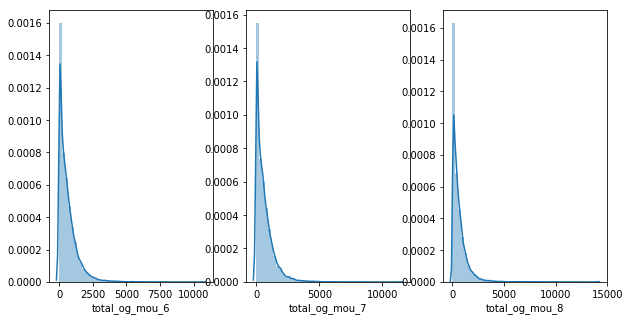

In [31]:
f, axes = plt.subplots(1, 3,figsize=(10,5))
sns.distplot(df_imputed['total_og_mou_6'], ax=axes[0])
sns.distplot(df_imputed['total_og_mou_7'], ax=axes[1])
sns.distplot(df_imputed['total_og_mou_8'], ax=axes[2])

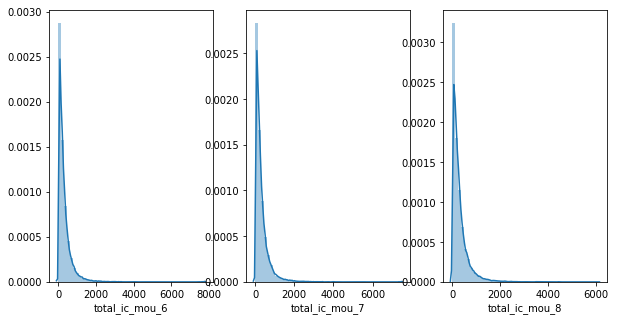

In [32]:
f, axes = plt.subplots(1, 3,figsize=(10,5))
sns.distplot(df_imputed['total_ic_mou_6'], ax=axes[0])
sns.distplot(df_imputed['total_ic_mou_7'], ax=axes[1])
sns.distplot(df_imputed['total_ic_mou_8'], ax=axes[2])

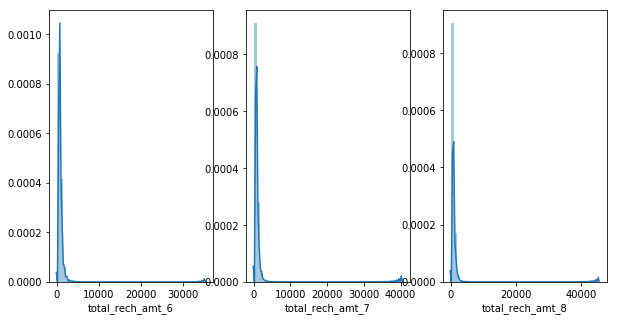

In [33]:
f, axes = plt.subplots(1, 3,figsize=(10,5))
sns.distplot(df_imputed['total_rech_amt_6'], ax=axes[0])
sns.distplot(df_imputed['total_rech_amt_7'], ax=axes[1])
sns.distplot(df_imputed['total_rech_amt_8'], ax=axes[2])

In [34]:
import datetime

df_imputed['date_of_last_rech_6'] =  pd.to_datetime(df_imputed['date_of_last_rech_6'], format='%m/%d/%Y')
df_imputed['date_of_last_rech_7'] =  pd.to_datetime(df_imputed['date_of_last_rech_7'], format='%m/%d/%Y')
df_imputed['date_of_last_rech_8'] =  pd.to_datetime(df_imputed['date_of_last_rech_8'], format='%m/%d/%Y')

In [35]:
x= df_imputed['date_of_last_rech_6']
y= df_imputed['last_day_rch_amt_6']
plt.scatter(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

TypeError: invalid type promotion

TypeError: invalid type promotion

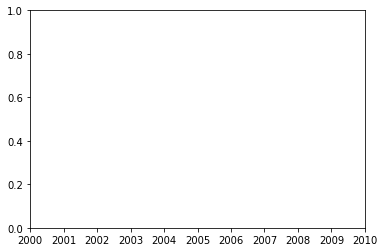

In [36]:
x= df_imputed['date_of_last_rech_7']
y= df_imputed['last_day_rch_amt_7']
plt.scatter(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [74]:
x= df_imputed['date_of_last_rech_8']
y= df_imputed['last_day_rch_amt_8']
plt.scatter(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [80]:
df_imputed = df_imputed.drop(['mobile_number'], axis = 1)

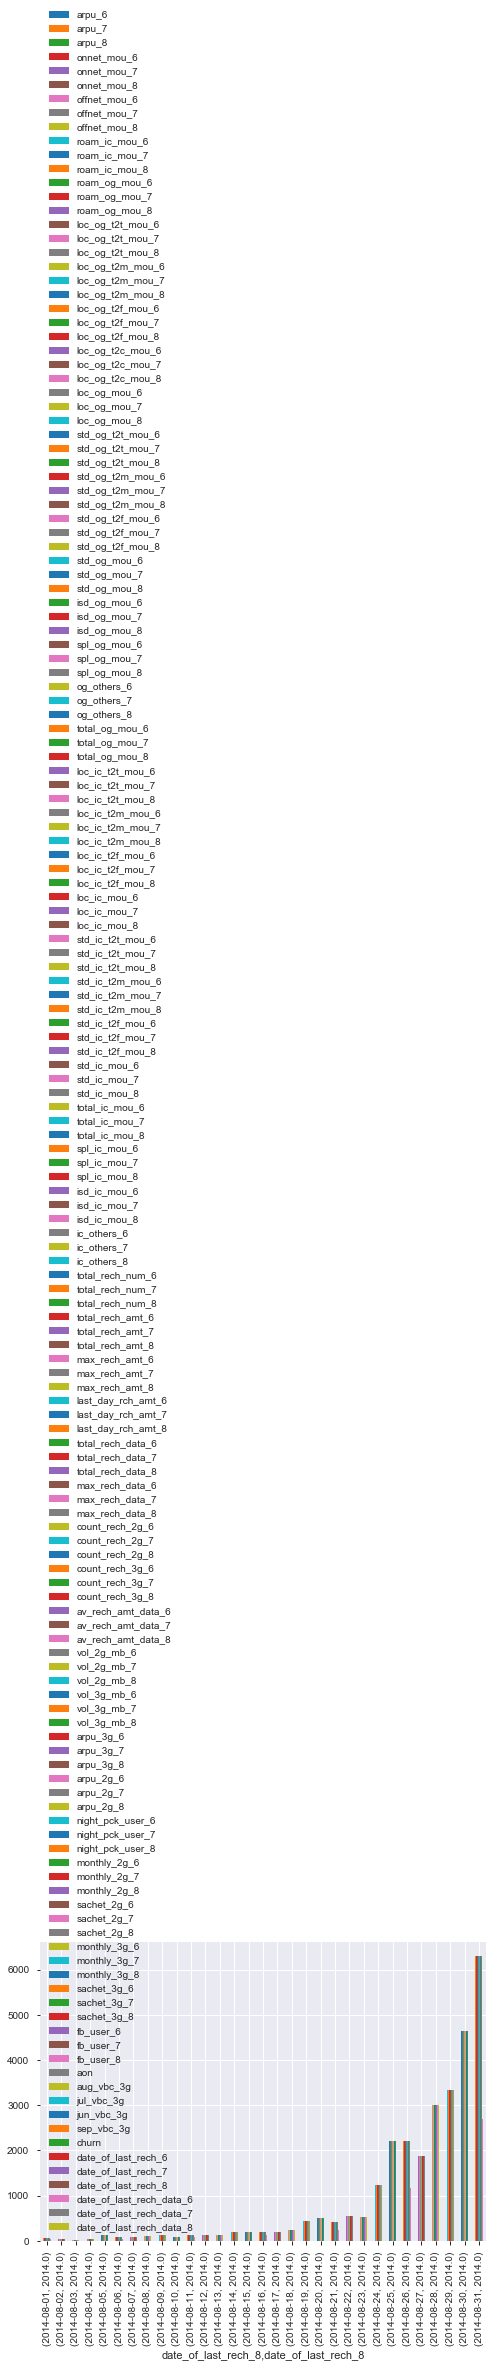

In [81]:
df_imputed.groupby([df_imputed["date_of_last_rech_8"].dt.date, df_imputed["date_of_last_rech_8"].dt.year]).count().plot(kind="bar")

In [75]:
sns.distplot(df_imputed['aon'])

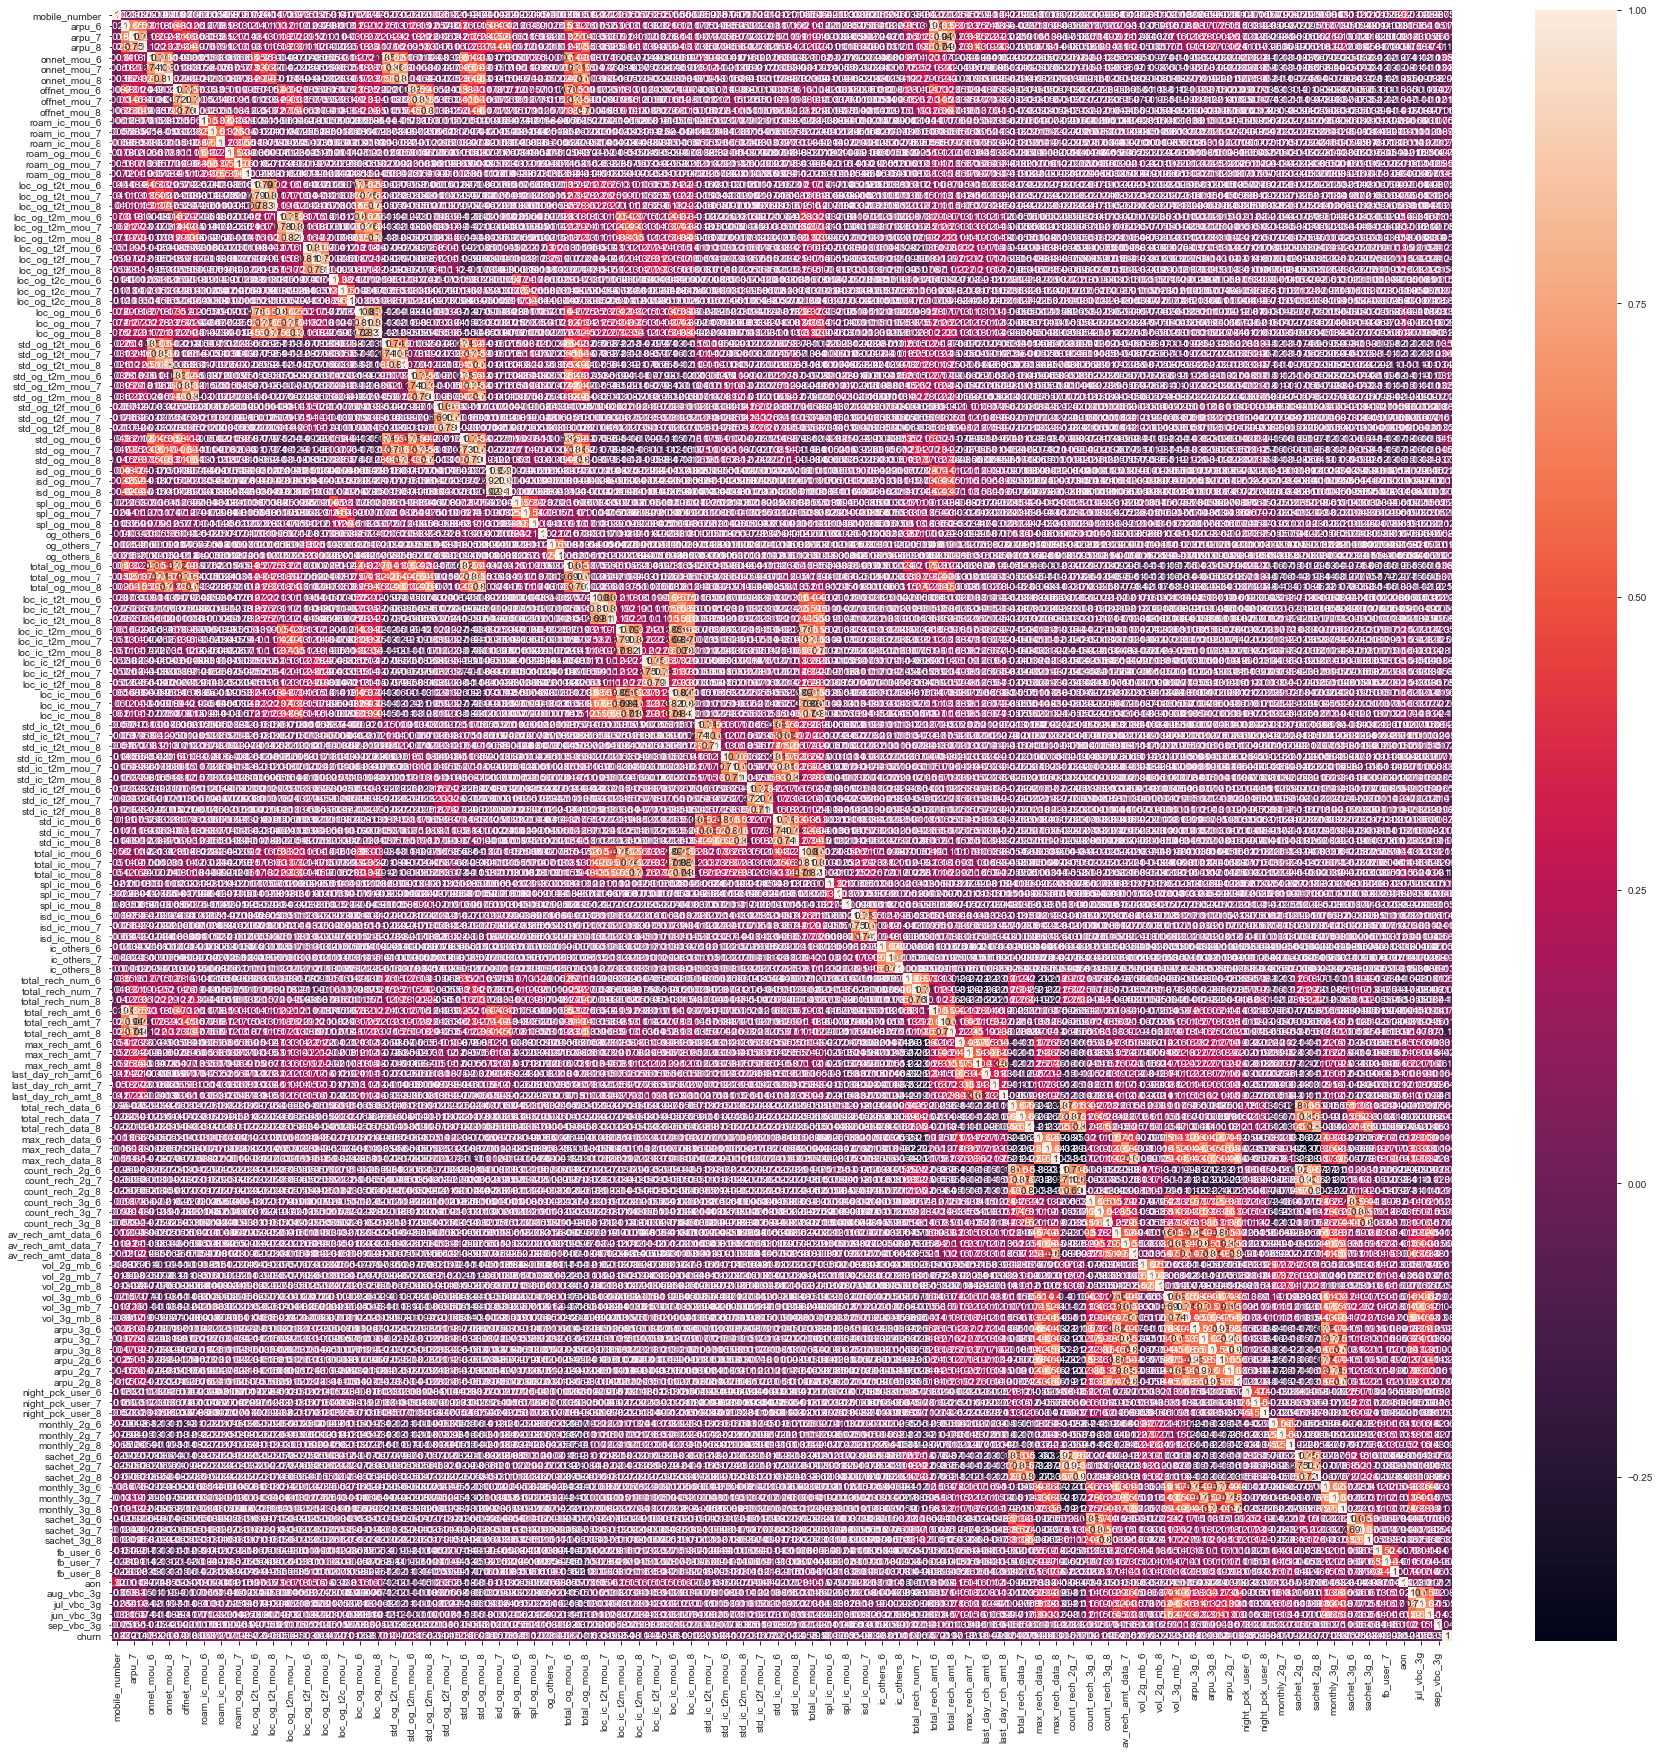

In [76]:
#checking the correlation
plt.figure(figsize = (30, 30))
sns.heatmap(df_imputed.corr(),annot = True)
plt.show()

In [83]:
#def trimm_correlated(df_in, threshold):
#    df_corr = df_in.corr(method='pearson', min_periods=1)
#    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
#    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
#    df_out = df_in[un_corr_idx]
#    return df_out.head()

In [84]:
#trimm_correlated(df_imputed, 90)

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
5975    20.000   467.174  685.454   280.977202     0.000000         0.00   
18546  409.351  -282.788  324.030   163.010000   187.310000        49.38   
45610  102.504   194.744  430.230    17.390000    17.440000        29.21   
34284  964.382  1257.854  228.262   455.060000   929.410000       661.63   
28478  213.839   427.585  213.787     0.000000   289.042146         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
5975     400.084968     20.810000         41.53      17.025936  ...   
18546    799.230000    460.410000        354.94       0.000000  ...   
45610    185.760000    269.690000        373.38       0.000000  ...   
34284   1561.260000   1873.980000       2442.91       0.000000  ...   
28478      0.000000    405.069536          0.00       0.000000  ...   

       sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
5975             0   0.920118   0.914561   0.880088  1704        0.00   
18546            0   0.920118   0.914561   0.880088   254        0.00   
45610            0   0.920118   0.914561   0.880088  2994        0.00   
34284            0   0.920118   0.914561   0.880088   314        0.00   
28478            0   1.000000   1.000000   1.000000   210       38.29   

       jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
5975         0.00        0.00         0.0      0  
18546        0.00        0.00         0.0      0  
45610        0.00        0.00         0.0      0  
34284        0.00        0.00         0.0      0  
28478       20.59        4.78         0.0      0  

[5 rows x 153 columns]

In [93]:
X = df_imputed.drop(['churn', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
                     'date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1)
y = df_imputed['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [94]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=100)

In [95]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [99]:
pd.DataFrame(pca.components_)

0             1             2             3             4    \
0   -9.999999e-01 -1.515183e-05 -9.684939e-06 -1.728130e-05  1.626450e-08   
1    4.492436e-05  1.182298e-01  1.428025e-01  1.367937e-01  1.387941e-01   
2    8.530544e-06  1.276702e-01  1.560230e-01  1.668121e-01  4.377719e-05   
3   -3.210760e-04  1.145437e-01  1.251492e-01  1.560196e-01 -7.136100e-02   
4    1.558691e-04  3.535395e-02  5.844151e-02  4.962659e-02 -3.058850e-01   
5    2.917041e-04  1.458760e-01  1.062542e-01  7.130821e-02  1.091713e-01   
6   -2.958841e-05  9.730848e-02  2.366188e-01  3.043895e-01 -7.951526e-02   
7   -9.619826e-05  2.927380e-01  9.096806e-02 -4.329683e-02  1.443906e-01   
8   -9.542854e-07 -2.023564e-02 -3.008386e-02 -2.103207e-02  3.739179e-02   
9    1.648986e-05  1.124366e-01 -6.789304e-02 -1.032630e-02 -3.714125e-02   
10   3.005305e-06  6.451364e-02 -2.562396e-01  1.435901e-01  8.234737e-02   
11   7.837260e-06  2.614162e-03 -1.541106e-02 -8.782547e-04  5.204692e-02   
12   2.247394e-05 -1.962035e-03 -2.739124e-03 -6.906413e-03 -6.371718e-03   
13  -2.927838e-05  4.129297e-03  2.311729e-02 -1.738817e-02  1.771889e-02   
14  -3.263263e-06  2.206036e-02  2.392488e-02  3.419792e-02  1.317242e-01   
15  -4.827288e-07 -7.020183e-02  1.032637e-02  3.212992e-02  3.874710e-01   
16  -9.554266e-06  2.638091e-01 -2.099508e-02 -1.685767e-01  6.741655e-02   
17   7.036624e-07  6.003072e-02 -3.565767e-02 -5.960424e-02 -1.598454e-02   
18  -1.083686e-06 -1.689784e-01  1.712668e-01 -1.800844e-02  7.492889e-02   
19   1.611558e-06 -1.048317e-01 -5.180541e-02  1.828146e-01 -1.079432e-02   
20  -9.528483e-07 -1.693653e-01 -1.262357e-01  1.108410e-01  2.650306e-02   
21   7.457972e-07 -7.525964e-03  1.538934e-02 -5.485616e-03 -1.975369e-01   
22   5.757118e-07 -1.264691e-02 -8.846306e-03 -9.751200e-03 -1.724459e-02   
23   2.156858e-06  6.008448e-02 -5.067606e-03  1.795803e-02  6.574814e-02   
24   2.917415e-07  1.415897e-02  5.593844e-03 -2.575055e-02 -8.905714e-02   
25   2.381487e-06 -5.806257e-02 -1.760855e-02 -3.191343e-02  4.780771e-02   
26  -4.221232e-06  5.333922e-02 -6.991874e-02  3.145658e-02  2.932301e-02   
27   2.508957e-06  4.010908e-02  3.039129e-04 -4.411134e-02  7.013870e-03   
28   3.186452e-07 -2.103180e-02 -7.036415e-02  3.524399e-02  1.906608e-01   
29   3.454827e-06  1.492270e-02  1.789347e-02 -3.575884e-02 -8.632374e-03   
..            ...           ...           ...           ...           ...   
123  3.033066e-09  1.968459e-04 -1.226144e-04 -1.389720e-04  8.366344e-04   
124 -1.440952e-09 -4.301489e-05  2.206416e-04 -2.138259e-04 -1.713839e-04   
125  1.610674e-10 -2.627652e-07  1.976451e-05 -2.452547e-05  1.249889e-04   
126 -1.984782e-09  8.966935e-06 -3.652364e-06  3.723654e-05 -1.255366e-04   
127  2.472585e-10 -8.245149e-06  1.265847e-06  1.281566e-05  3.788530e-04   
128  2.702764e-09  7.139408e-06 -1.331180e-05  5.115635e-06  2.065516e-04   
129 -2.155401e-11  6.601510e-06  5.649680e-06 -1.834409e-05  9.421022e-06   
130 -4.438944e-10 -8.281396e-06  7.455356e-06 -3.741718e-07 -4.524996e-04   
131 -7.054950e-10 -3.142469e-06 -2.050614e-06 -5.163255e-07 -1.184201e-04   
132  2.326806e-10  8.494285e-07  4.717645e-07  1.292268e-06  2.032398e-06   
133  1.785037e-12 -5.400221e-09 -2.316521e-07 -5.012823e-07 -1.739796e-06   
134  1.789151e-10 -2.355605e-07 -1.918000e-08 -4.340609e-07  4.283699e-06   
135  3.866034e-11  5.075609e-07  1.392538e-07 -3.499586e-07  7.650745e-06   
136 -3.397651e-12  9.721724e-08 -5.026665e-07  1.562516e-07  2.695343e-06   
137  2.773401e-11 -1.343465e-08  1.877388e-07  2.531191e-07  2.150628e-06   
138  5.588287e-11 -2.000074e-07  1.056446e-07 -8.079096e-08 -2.588880e-06   
139 -1.912256e-11  7.538130e-10  6.687316e-08 -2.119146e-07  1.878658e-07   
140  8.423035e-11  2.647132e-07 -1.888947e-07 -1.474262e-07  1.822009e-06   
141 -7.619455e-12  9.703118e-08 -3.762346e-07  4.233689e-08  3.275325e-06   
142  1.133485e-11  2.473228e-08 -5.628756e-08 -1.207058e-07 -4.693626e-07   
143  5.256

In [98]:
pca.shape

AttributeError: 'PCA' object has no attribute 'shape'